In [1]:
from google.colab import drive
drive.mount('/content/drive')

import os
import zipfile

file_path = '/content/drive/MyDrive/UCI HAR Dataset.zip'


extract_path = '/content/drive/MyDrive/UCI HAR Dataset'

os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"Dataset extracted to: {extract_path}")


print(os.listdir(extract_path))

Mounted at /content/drive
Dataset extracted to: /content/drive/MyDrive/UCI HAR Dataset
['UCI HAR Dataset', '__MACOSX']


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


X_train = pd.read_csv('/content/drive/MyDrive/UCI HAR Dataset/UCI HAR Dataset/train/X_train.txt', delim_whitespace=True, header=None)
y_train = pd.read_csv('/content/drive/MyDrive/UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt', header=None)


X_test = pd.read_csv('/content/drive/MyDrive/UCI HAR Dataset/UCI HAR Dataset/test/X_test.txt', delim_whitespace=True, header=None)
y_test = pd.read_csv('/content/drive/MyDrive/UCI HAR Dataset/UCI HAR Dataset/test/y_test.txt', header=None)

print(f'X_train shape: {X_train.shape}, y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}, y_test shape: {y_test.shape}')


print("Unique values in y_train:", np.unique(y_train))
print("Unique values in y_test:", np.unique(y_test))


if np.min(y_train) == 1 and np.max(y_train) == 6:
    y_train = y_train - 1
if np.min(y_test) == 1 and np.max(y_test) == 6:
    y_test = y_test - 1

print("Adjusted unique values in y_train:", np.unique(y_train))
print("Adjusted unique values in y_test:", np.unique(y_test))

<ipython-input-2-e6a3136c4d49>:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train = pd.read_csv('/content/drive/MyDrive/UCI HAR Dataset/UCI HAR Dataset/train/X_train.txt', delim_whitespace=True, header=None)
<ipython-input-2-e6a3136c4d49>:13: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_test = pd.read_csv('/content/drive/MyDrive/UCI HAR Dataset/UCI HAR Dataset/test/X_test.txt', delim_whitespace=True, header=None)


X_train shape: (7352, 561), y_train shape: (7352, 1)
X_test shape: (2947, 561), y_test shape: (2947, 1)
Unique values in y_train: [1 2 3 4 5 6]
Unique values in y_test: [1 2 3 4 5 6]
Adjusted unique values in y_train: [0 1 2 3 4 5]
Adjusted unique values in y_test: [0 1 2 3 4 5]


In [7]:
logistic_model = LogisticRegression(max_iter=1000, random_state=42)

logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy without standard scalar : {accuracy * 100:.2f}%")


Accuracy without standard scalar : 96.10%


In [4]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

y_train = y_train.values.ravel()
y_test = y_test.values.ravel()


logistic_model = LogisticRegression(max_iter=1000, random_state=42)


logistic_model.fit(X_train_scaled, y_train)


y_pred = logistic_model.predict(X_test_scaled)

Accuracy with Standard scaler : 95.52%
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.97       496
           1       0.96      0.95      0.95       471
           2       0.99      0.94      0.96       420
           3       0.97      0.88      0.92       491
           4       0.89      0.98      0.93       532
           5       1.00      0.99      1.00       537

    accuracy                           0.96      2947
   macro avg       0.96      0.95      0.95      2947
weighted avg       0.96      0.96      0.96      2947



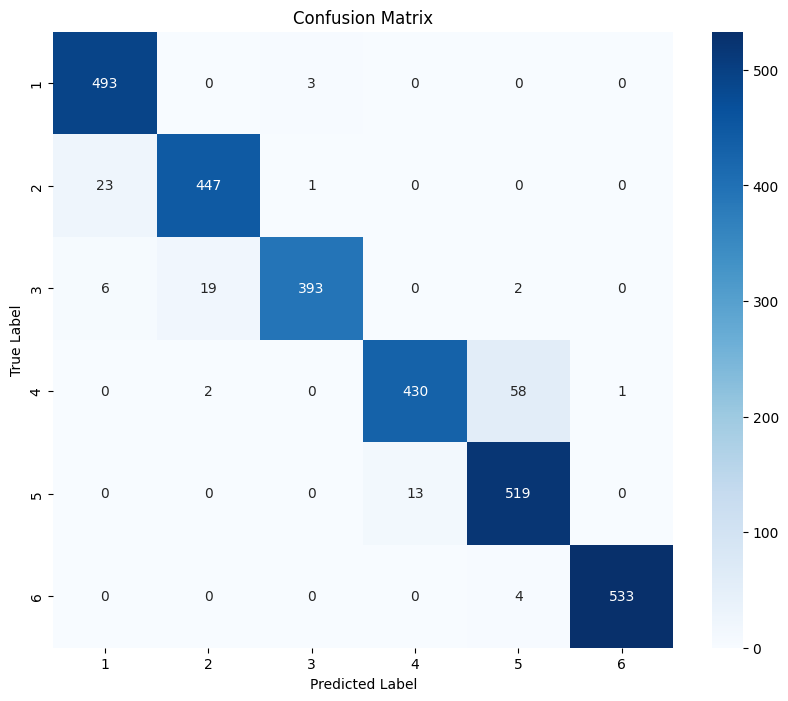

In [5]:

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with Standard scaler : {accuracy * 100:.2f}%")

print("Classification Report:\n", classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(1, 7), yticklabels=range(1, 7))
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()
